[NbConvertApp] Converting notebook Hilfsfunktionen.ipynb to script
[NbConvertApp] Writing 24697 bytes to Hilfsfunktionen.py


Load data: filtered_data\230809\two_timesteps_230809_231108.ohm
Load data: filtered_data\231108\two_timesteps_230809_231108.ohm


24/04/25 - 14:40:14 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 14:40:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 14:40:14 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 14:40:14 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 14:40:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 14:40:15 - pyGIMLi - INFO - Use median(data values)=2368.91
24/04/25 - 14:40:15 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=2368.910000/2368.910000
24/04/25 - 14:40:15 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C17D94B010>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C17D94B290>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C17D94B100>
min/max (data): 129/6858
min/max (error): 3%/3.01%
min/max (start model): 2369/2369
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  797.52
--------------------------------------------------------------------------------
inv.iter 1 ... 

24/04/25 - 14:40:57 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 14:40:57 - pyGIMLi - INFO - Region with smallest marker (1) set to background
24/04/25 - 14:40:57 - pyGIMLi - INFO - Creating forward mesh from region infos.


chi² =   28.43 (dPhi = 95.68%) lam: 20.0


24/04/25 - 14:40:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 14:40:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 14:40:58 - pyGIMLi - INFO - Starting inversion.


3104 model cells
Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x000001C17CCCA070>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001C17D958DD0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C17D94B150>
min/max (data): 129/6858
min/max (error): 3%/3.01%
min/max (start model): 2233/2233
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 6136.86
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  154.69 (dPhi = 97.39%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   29.27 (dPhi = 79.99%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    5.91 (dPhi = 73.28%) lam: 15.0
--------------------------------------------------------------------------------
inv.it

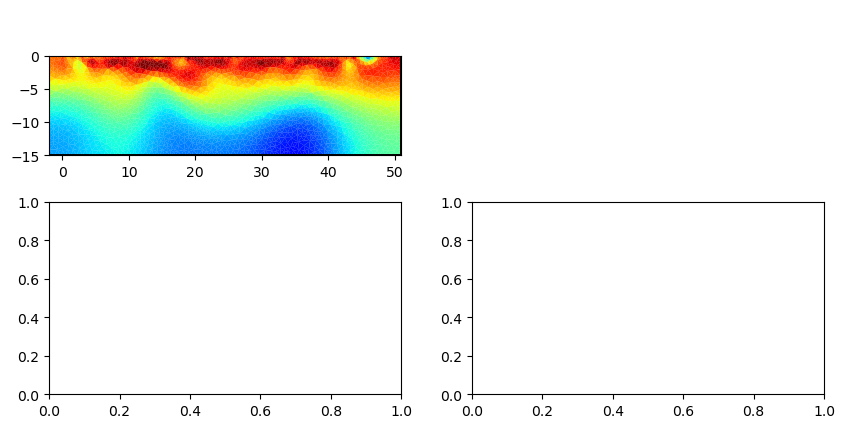

T_Profil1_array_array_2023-08-09-13H_1.709e-06.npy
T_Profil2_array_array_2023-11-08-10H_1.709e-06.npy


24/04/25 - 14:46:53 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 14:46:53 - pyGIMLi - INFO - Region with smallest marker (1) set to background
24/04/25 - 14:46:53 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 14:46:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 14:46:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736


3104 model cells
Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736


24/04/25 - 14:46:55 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x000001C1D1580770>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001C1D29F9460>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C1D037A020>
min/max (data): 75.75/5523
min/max (error): 3%/3.01%
min/max (start model): 1568/1568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 6035.60
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  167.46 (dPhi = 97.12%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   35.91 (dPhi = 77.29%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    9.59 (dPhi = 67.12%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    8.85 (dPhi = 7.20%) lam: 15.0
---------------

<Figure size 640x480 with 0 Axes>

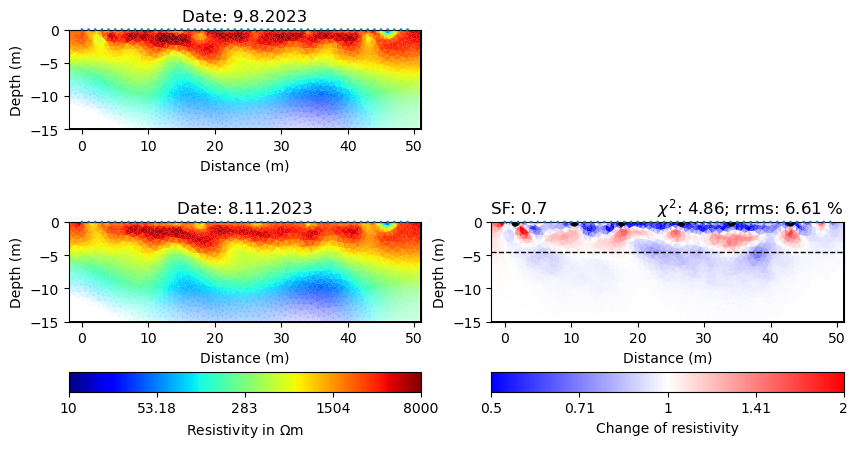

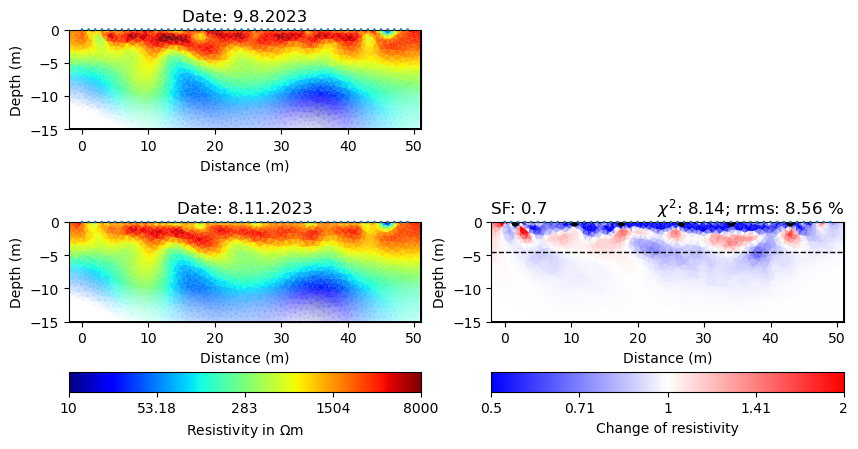

In [1]:
from pathlib import Path
import pygimli as pg  # Stelle sicher, dass das Modul pg importiert ist und verfügbar ist
from pygimli.physics import ert
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
import os
import numpy as np

from Hilfsfunktionen import T_corr_nach_Inversion
from Hilfsfunktionen import plotting_function
from Hilfsfunktionen import plotting_function_FTL

# Read data
file = "two_timesteps_230809_231108.ohm"
two_timesteps = False
base_dir = Path("filtered_data")
data = []
for unterordner in base_dir.iterdir():
    if unterordner.is_dir():
        datei_pfad = unterordner / "two_timesteps_230809_231108.ohm" 
        if datei_pfad.exists():
            daten_objekt = pg.load(str(datei_pfad))
            data.append([unterordner.name, daten_objekt])
            print(f"Load data: {datei_pfad}")

# Create method manager
manager = []
for ts in data:
    manager.append(ert.ERTManager(ts[1], verbose=True))

# Create mesh
mesh = manager[0].createMesh(quality = 34, paraMaxCellSize=0.5, paraDepth=15)
manager[0].invert(quality = 34, paraMaxCellSize=0.5, maxIter=1 ,dPhi= 0.1, paraDepth=15,lam=20)

# Inversion without temperature correction
DATA = [dat[1] for dat in data]
# Full time-lapse
scalef = 0.7
fop = pg.frameworks.MultiFrameModelling(ert.ERTModelling, scalef=scalef)
fop.setData(DATA)
fop.setMesh(mesh)
print(fop.mesh()) 
dataVec = np.concatenate([data["rhoa"] for data in DATA])
errorVec = np.concatenate([data["err"] for data in DATA])
startModel = fop.createStartModel(dataVec)
inv = pg.Inversion(fop=fop, startModel=startModel, verbose=True)
model = inv.run(dataVec, errorVec, maxIter=10, lam= 15, startModel=startModel, verbose=True)
chi2 = []
rrms = []
chi2.append(round(inv.chi2(),2))
rrms.append(round(inv.relrms(),2))
mod = np.reshape(model, [len(DATA), -1])

# PLot
plotting_function_FTL(data,manager = manager, results = mod, folder_name= 'Fig16', filename= 'two_timesteps_231211_240131_without_Tcorr', chi2=chi2, scalef=scalef, rrms=rrms)
plotting_function_FTL(data,manager = manager, results = mod, folder_name= 'Fig16', filename= 'two_timesteps_231211_240131_without_Tcorr', chi2=chi2, scalef=scalef, rrms=rrms)

# Temperature correction    
ort_2 = 'Georg-Westermann-Park'
mod_corr = []
temp_spread = []
timestep = 0
mesh2 = manager[0].mesh.createSubMesh(manager[0].mesh.cells(manager[0].mesh.cellMarkers() == 2))
for count, m in enumerate(mod):
    timestep = count+1
    dateien = os.listdir(r".\Temperature_data/" + ort_2 )
    for datei in dateien: 
        if (datei).startswith('T_Profil%s_array' % (str(timestep))):
            print(datei)
            Temp_tiefe_vektor = np.load(r'.\Temperature_data/%s/' % (ort_2) + datei, allow_pickle=True)
    res_new,Tem_new = T_corr_nach_Inversion(m, mesh2, Temp_tiefe_vektor)
    mod_corr.append(res_new)
    temp_spread.append(Tem_new)

modell2 = np.reshape(mod, -1)
modell_corr = np.reshape(mod_corr, -1)
response = inv.fop.response(modell2)
response_t_corr = inv.fop.response(modell_corr)
difference = response_t_corr - response
diff = np.reshape(difference, [len(DATA), -1])
for h in range(len(diff)):
    DATA[h]['rhoa'] = DATA[h]['rhoa'] + diff[h]
    
    
# Inversion with temperature correction
# Full time-lapse
scalef = 0.7
fop = pg.frameworks.MultiFrameModelling(ert.ERTModelling, scalef=scalef)
fop.setData(DATA)
#manager[0].createMesh(quality=34,paraMaxCellSize=20)
fop.setMesh(mesh)
print(fop.mesh())  # important to call mesh() function once!
dataVec = np.concatenate([data["rhoa"] for data in DATA])
errorVec = np.concatenate([data["err"] for data in DATA])
startModel = fop.createStartModel(dataVec)
inv = pg.Inversion(fop=fop, startModel=startModel, verbose=True)
model = inv.run(dataVec, errorVec, maxIter=10, lam= 15, startModel=startModel, verbose=True)
chi2 = []
rrms = []
chi2.append(round(inv.chi2(),2))
rrms.append(round(inv.relrms(),2))
kw = dict(cMin=10, cMax=300, logScale=True, cMap="jet")
pd = fop.paraDomain
mod_Tcorr = np.reshape(model, [len(DATA), -1])

# Plot 
plotting_function_FTL(data, manager = manager,results = mod_Tcorr, folder_name= 'Fig16', filename= 'two_timesteps_231211_240131_with_Tcorr', chi2=chi2, scalef=scalef, rrms = rrms)